In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pickle-mixin

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [11]:
#importing libries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

In [12]:
df=pd.read_csv(r"C:\Users\Vishnu\mini project\Dataset\data.csv")

In [13]:
df.head()

,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
0,13-03-12,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0,17.8275
1,13-03-12,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0,18.1207
2,13-03-12,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0,18.4367
3,13-03-12,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0,18.7513
4,13-03-12,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0,19.0414


In [14]:
df.shape

(4137, 18)

<Axes: xlabel='Indoor_temperature_room', ylabel='Count'>

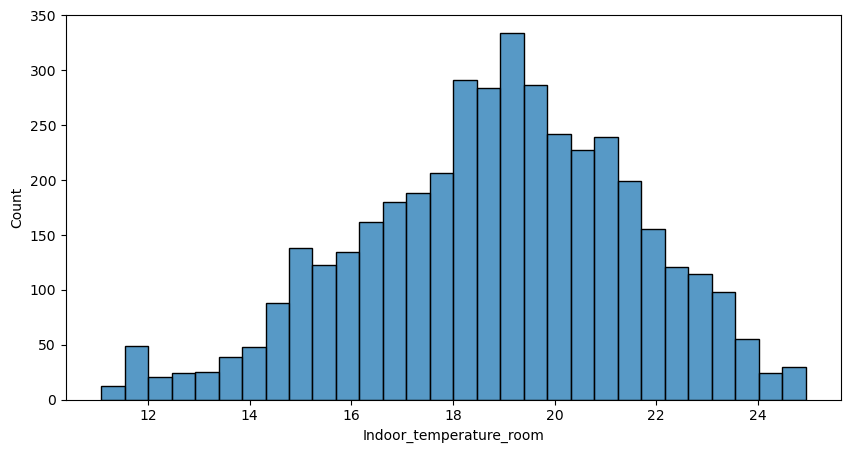

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Indoor_temperature_room',)

<Axes: xlabel='Relative_humidity_room', ylabel='Relative_humidity_(dinning-room)'>

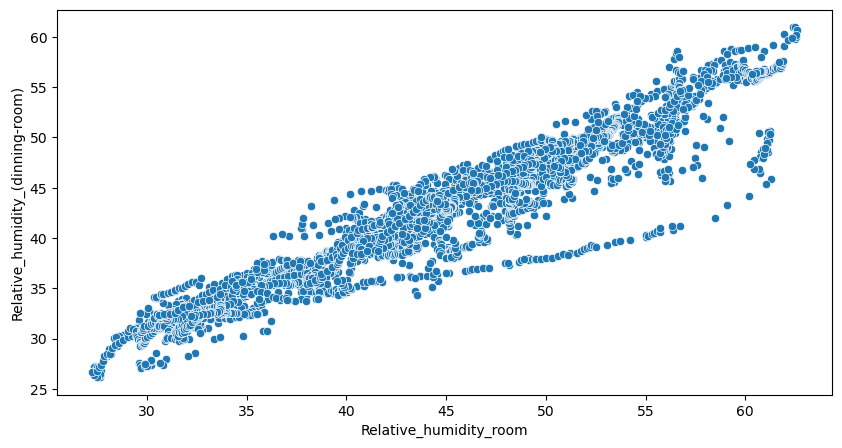

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Relative_humidity_room',y='Relative_humidity_(dinning-room)')

<Axes: xlabel='CO2_room', ylabel='Relative_humidity_(dinning-room)'>

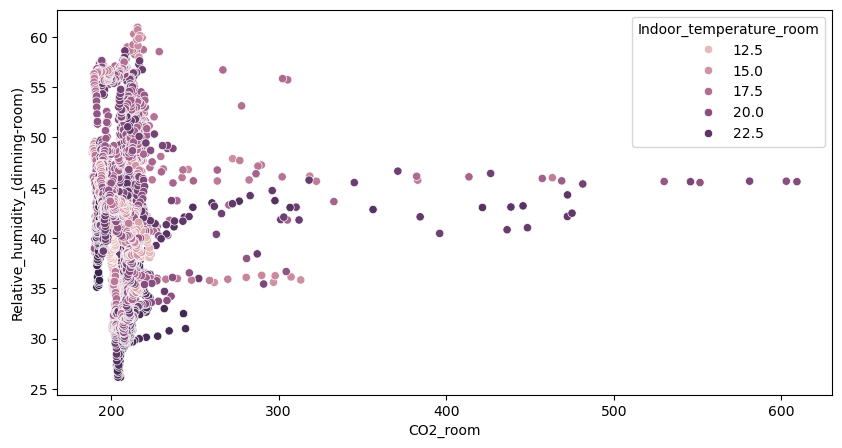

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='CO2_room',y='Relative_humidity_(dinning-room)',hue='Indoor_temperature_room')

In [18]:
df.describe()

,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week,Indoor_temperature_room
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549,18.833407
std,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923,2.702312
min,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000,11.076000
25%,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000,17.067300
50%,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000,19.000797
75%,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000,20.786062
max,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000,24.944000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              4137 non-null   object 
 1   Time                              4137 non-null   object 
 2   CO2_(dinning-room)                4137 non-null   float64
 3   CO2_room                          4137 non-null   float64
 4   Relative_humidity_(dinning-room)  4137 non-null   float64
 5   Relative_humidity_room            4137 non-null   float64
 6   Lighting_(dinning-room)           4137 non-null   float64
 7   Lighting_room                     4137 non-null   float64
 8   Meteo_Rain                        4137 non-null   float64
 9   Meteo_Sun_dusk                    4137 non-null   float64
 10  Meteo_Wind                        4137 non-null   float64
 11  Meteo_Sun_light_in_west_facade    4137 non-null   float64
 12  Meteo_

In [20]:
df.isnull().sum()

Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
Indoor_temperature_room             0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              4137 non-null   object 
 1   Time                              4137 non-null   object 
 2   CO2_(dinning-room)                4137 non-null   float64
 3   CO2_room                          4137 non-null   float64
 4   Relative_humidity_(dinning-room)  4137 non-null   float64
 5   Relative_humidity_room            4137 non-null   float64
 6   Lighting_(dinning-room)           4137 non-null   float64
 7   Lighting_room                     4137 non-null   float64
 8   Meteo_Rain                        4137 non-null   float64
 9   Meteo_Sun_dusk                    4137 non-null   float64
 10  Meteo_Wind                        4137 non-null   float64
 11  Meteo_Sun_light_in_west_facade    4137 non-null   float64
 12  Meteo_

In [22]:
# Assuming your DataFrame is named 'df'
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [23]:
df.drop(['CO2_(dinning-room)','Relative_humidity_(dinning-room)','Lighting_(dinning-room)','Meteo_Sun_dusk','Meteo_Sun_light_in_east_facade','Meteo_Sun_light_in_south_facade','Meteo_Sun_irradiance','Day_of_the_week'],axis=1, inplace=True)

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [25]:
x.shape

(4137, 7)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled= sc.fit_transform(x_train)
x_test_scaled= sc.transform(x_test)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lir=LinearRegression()
lir.fit(x_train_scaled,y_train)

NameError: name 'x_train_scaled' is not defined

In [ ]:
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

In [ ]:
x_test_scaled.shape

(1242, 7)

In [ ]:
pred=lir.predict(x_test_scaled)

In [ ]:
r2_score(pred,y_test)

-0.4426495167688036

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
x_train.shape

(2895, 7)

In [ ]:
x_test.shape

(1242, 7)

In [ ]:
pred=rf.predict(x_test)

In [ ]:
pred

array([23.16513337, 17.523718  , 21.17828828, ..., 20.2239653 ,
       17.87788002, 18.733412  ])

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.873384878414834

In [ ]:
lg=lgb.LGBMRegressor()

In [ ]:
lg.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1539
[LightGBM] [Info] Number of data points in the train set: 2895, number of used features: 7
[LightGBM] [Info] Start training from score 18.804740


LGBMRegressor()

In [ ]:
pred=lg.predict(x_test)

In [ ]:
r2_score(y_test,pred)

0.8569554082913747

In [ ]:
xg=xgb.XGBRegressor()

In [ ]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=xg.predict(x_test)

In [ ]:
r2_score(y_test,pred)

0.8547022627762138

In [ ]:
import pickle 
pickle.dump(rf,open('temperature.pkl','wb'))

In [ ]:
import os
os.getcwd()

'C:\\Users\\Vishnu\\SmartHomeTempPrediction_Vishnu'